# determine footprint of SV3

In this notebook, I'll calculate the footprint of SV3 BGS with all the veto masks

In [9]:
import os
import fitsio
import numpy as np 
from astropy.table import Table

In [11]:
# -- plotting -- 
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['font.family'] = 'serif'
#mpl.rcParams['text.usetex'] = True
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False

In [2]:
# BGS galaxies
ff = fitsio.read('/global/cfs/cdirs/desi/survey/catalogs/SV3/LSS/fuji/LSScats/EDAbeta/BGS_ANY_full.dat.fits')

In [3]:
# full randoms that encompass the tiles
ran = Table.read('/global/cfs/cdirs/desi/survey/catalogs/SV3/LSS/random0/alltilesnofa.fits')

In [4]:
# random + tiles + veto mask
ran0 = Table.read('/global/cfs/cdirs/desi/survey/catalogs/SV3/LSS/fuji/LSScats/EDAbeta/BGS_ANY_0_full.ran.fits')

(-2.0, 2.0)

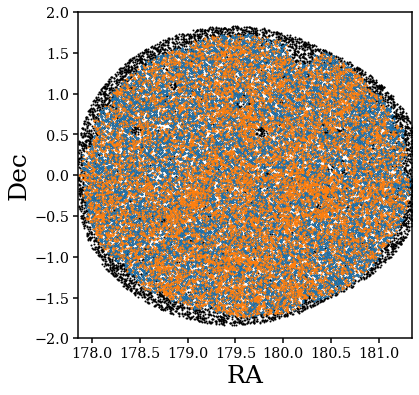

In [8]:
fig = plt.figure(figsize=(6,6))
sub = fig.add_subplot(111)
sub.scatter(ran['RA'], ran['DEC'], s=1, c='k')
sub.scatter(ran0['RA'], ran0['DEC'], s=1)
sub.scatter(ff['RA'], ff['DEC'], s=1)
sub.set_xlabel('RA', fontsize=25)
sub.set_xlim(177.85, 181.35)
sub.set_ylabel('Dec', fontsize=25)
sub.set_ylim(-2, 2)

# 1. full footprint of random
Each of the 18 random catalog is generated to have uniform object density of 2500/deg2. 

$$A = N_{\rm ran} / 18. / (2500 {\rm deg}^{-2})$$

In [5]:
Nran = 0
for i in range(18): 
    ran = Table.read('/global/cfs/cdirs/desi/survey/catalogs/SV3/LSS/random%i/alltilesnofa.fits' % i)
    Nran += len(ran)

footprint_full_random = float(Nran)/18./2500.
print('%.3f deg2' % (float(Nran)/18./2500.))

207.452 deg2


# 2. calculate footprint of randoms 

In [6]:
Nran_veto = 0
for i in range(18): 
    ran0 = Table.read('/global/cfs/cdirs/desi/survey/catalogs/SV3/LSS/fuji/LSScats/EDAbeta/BGS_ANY_%i_full.ran.fits' % i)
    Nran_veto += len(ran0)
print('%.3f deg2' % (footprint_full_random * float(Nran_veto)/float(Nran)))

173.641 deg2


# 3. calculate footprint for jackknife 

In [7]:
Nran_fields = [0 for i in range(12)]
for i in range(18):
    bgs = Table.read('/global/cfs/cdirs/desi/survey/catalogs/SV3/LSS/fuji/LSScats/EDAbeta/BGS_ANY_%i_full.ran.fits' % i)

    fields = [
        ((bgs['RA'] > 140) & (bgs['RA'] < 160)), 
        ((bgs['RA'] > 160) & (bgs['RA'] < 185) & (bgs['DEC'] > -10) & (bgs['DEC'] < 10)), 
        ((bgs['RA'] > 205) & (bgs['RA'] < 212) & (bgs['DEC'] > 2) & (bgs['DEC'] < 8)), 
        ((bgs['RA'] > 210) & (bgs['RA'] < 224) & (bgs['DEC'] > -5) & (bgs['DEC'] < 5) & ~((bgs['RA'] > 205) & (bgs['RA'] < 212) & (bgs['DEC'] > 2) & (bgs['DEC'] < 8))),
        ((bgs['RA'] > 190) & (bgs['RA'] < 200) & (bgs['DEC'] > 20) & (bgs['DEC'] < 30)), 
        ((bgs['RA'] > 210) & (bgs['RA'] < 225) & (bgs['DEC'] > 30) & (bgs['DEC'] < 40)),     
        ((bgs['RA'] > 250) & (bgs['RA'] < 260) & (bgs['DEC'] > 30) & (bgs['DEC'] < 40)),
        ((bgs['RA'] > 230) & (bgs['RA'] < 255) & (bgs['DEC'] > 40) & (bgs['DEC'] < 45)),    
        ((bgs['RA'] > 210) & (bgs['RA'] < 225) & (bgs['DEC'] > 45) & (bgs['DEC'] < 58)),        
        ((bgs['RA'] > 235) & (bgs['RA'] < 255) & (bgs['DEC'] > 50) & (bgs['DEC'] < 60)), 
        ((bgs['RA'] > 180) & (bgs['RA'] < 200) & (bgs['DEC'] > 55) & (bgs['DEC'] < 70)), 
        ((bgs['RA'] > 260) & (bgs['RA'] < 280) & (bgs['DEC'] > 55) & (bgs['DEC'] < 70))]
    for ii, field in enumerate(fields): 
        Nran_fields[ii] += np.sum(~field)

In [8]:
for Nran_field in Nran_fields: 
    print('%.3f deg2' % (footprint_full_random * float(Nran_field)/float(Nran)))

164.965 deg2
156.064 deg2
164.917 deg2
138.785 deg2
155.972 deg2
164.848 deg2
165.120 deg2
148.024 deg2
165.015 deg2
165.030 deg2
164.890 deg2
156.806 deg2
